# GLIP DEMO

from https://github.com/microsoft/GLIP

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
pylab.rcParams['figure.figsize'] = 20, 12
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.engine.predictor_glip import GLIPDemo

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img, caption):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:313: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:378: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:428: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` i

In [2]:
# Use this command to evaluate the GLPT-L model
# ! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_large_model.pth -O MODEL/glip_large_model.pth
config_file = "configs/pretrain/glip_Swin_L.yaml"
weight_file = "MODEL/glip_large_model.pth"

# update the config options with the config file
# manual override some options
cfg.local_rank = 1
cfg.num_gpus = 1
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.WEIGHT", weight_file])
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [3]:
pwd

'/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det'

In [12]:
glip_demo.color = 255

In [4]:
glip_demo = GLIPDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    show_mask_heatmaps=False
)

/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


[[[0, 4]]]
inference time per image: 0.14035104005597532


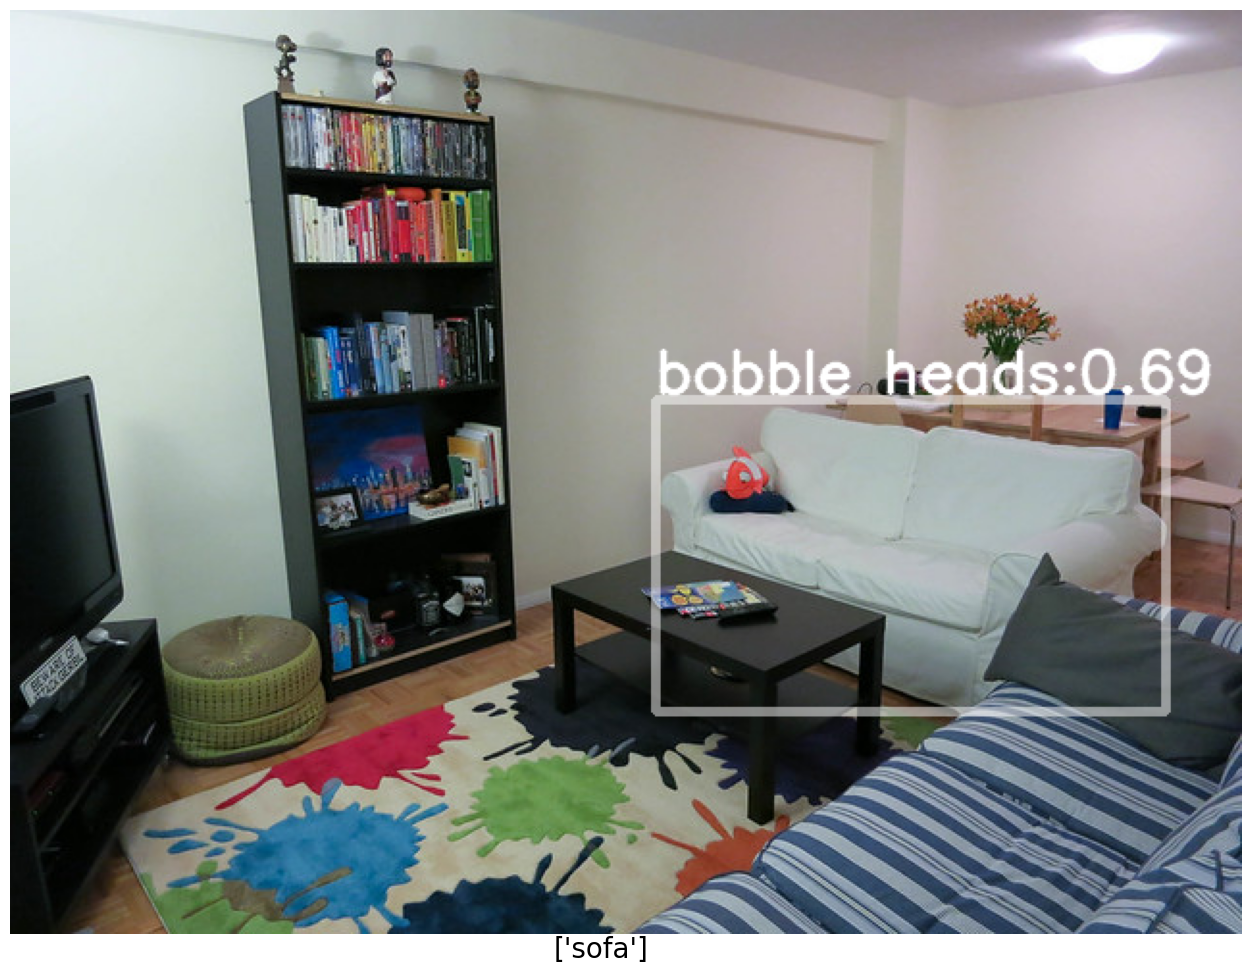

In [22]:
image = load('http://farm4.staticflickr.com/3693/9472793441_b7822c00de_z.jpg')
# caption = 'bobble heads on top of the shelf'
caption = ["sofa"]
result, _ = glip_demo.run_on_web_image(image, caption, 0.5)
imshow(result, caption)

In [6]:
import nltk

In [9]:
# nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jielei/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True